In [1]:

import numpy as np
import matplotlib.pyplot as plt



In [2]:
data=np.loadtxt('F2ratio.dat')

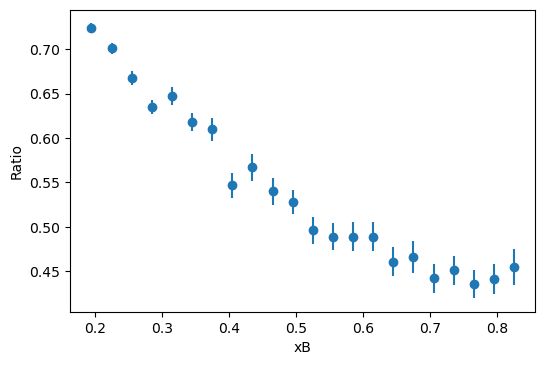

In [3]:
plt.figure(dpi=100)
plt.errorbar(data[:,0],data[:,3],yerr=data[:,4],fmt='o')
plt.xlabel('xB')
plt.ylabel('Ratio')
plt.show()

In [4]:
from lmfit import Model

In [5]:
def rational(x,n0,n1,m1):
    return n0*(1+x*n1)/(1+x*m1)

In [6]:
model=Model(rational)

In [7]:
result=model.fit(data[:,3],x=data[:,0],n0=1,n1=0,m1=0,weights=1/data[:,4])

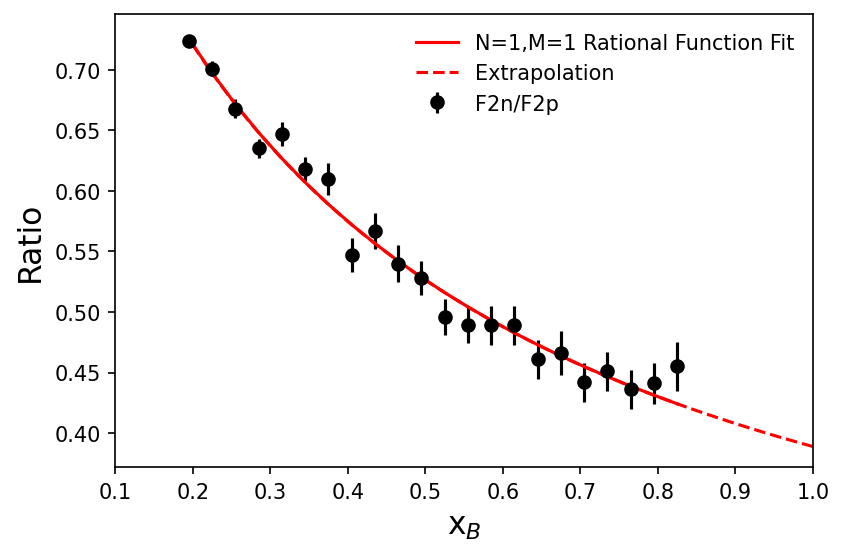

In [8]:
plt.figure(dpi=150)
plt.plot(data[:,0], result.best_fit, 'r-', label='N=1,M=1 Rational Function Fit')
x=np.linspace(0.2,1,100)
plt.plot(x, rational(x,**result.best_values), 'r--', label='Extrapolation')
plt.errorbar(data[:,0],data[:,3],yerr=data[:,4],fmt='o',color="black",label="F2n/F2p")
plt.xlabel('x$_B$',fontsize=15)
plt.ylabel('Ratio',fontsize=15)
plt.xlim(0.1,1)
plt.legend(frameon=False)
plt.savefig("extrapolation.png")
plt.show()

In [9]:
result.best_values

{'n0': 1.0157995814083007, 'n1': 0.362122426538518, 'm1': 2.5577670730710254}

In [10]:
print(rational(1,**result.best_values))

0.3889078071404882
